# Wine Quality Prediction

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import pickle

## Dataset Description

This datasets is related to red variants of the Portuguese "Vinho Verde" wine.
The dataset describes the amount of various chemicals present in wine and their effect on it's quality. 

This data frame contains the following columns:

Input variables (based on physicochemical tests):\
    
1 - fixed acidity\
    
2 - volatile acidity\
    
3 - citric acid\
    
4 - residual sugar\
    
5 - chlorides\
    
6 - free sulfur dioxide\
    
7 - total sulfur dioxide\
    
8 - density\
    
9 - pH\
    
10 - sulphates\
    
11 - alcohol\
    
Output variable (based on sensory data):\
        
12 - quality (score between 0 and 10)

## Exploratory Data Analysis

In [2]:
#Load the dataset
df=pd.read_csv("WineQT.csv")
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
0         9.4        5     0  
1         9.8        5     1  
2         9.8        5     2  
3         9.8        6     3  
4         9.4        5     4  
...       ...      ...   ...  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597  

[1143 rows x 13 columns]

In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

It is a labeled data.

In [4]:
#Random 25 samples
df.sample(25)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
636             8.9             0.310         0.36             2.6      0.056   
880             7.4             0.550         0.19             1.8      0.082   
357            10.5             0.240         0.42             1.8      0.077   
437            11.3             0.370         0.41             2.3      0.088   
305            10.4             0.410         0.55             3.2      0.076   
772             9.2             0.310         0.36             2.2      0.079   
1053            9.9             0.500         0.50            13.8      0.205   
849             7.9             0.340         0.36             1.9      0.065   
739             5.6             0.605         0.05             2.4      0.073   
141            11.5             0.300         0.60             2.0      0.067   
407             9.8             0.500         0.49             2.6      0.250   
918             5.9             0.395         0.13             2.4      0.056   
883             7.5             0.580         0.14             2.2      0.077   
1030            7.2             0.380         0.31             2.0      0.056   
719             8.2             0.320         0.42             2.3      0.098   
230            10.0             0.490         0.20            11.0      0.071   
361            13.3             0.290         0.75             2.8      0.084   
381             8.1             0.825         0.24             2.1      0.084   
363            10.7             0.400         0.48             2.1      0.125   
949             6.0             0.500         0.00             1.4      0.057   
1009            7.3             0.340         0.33             2.5      0.064   
553             9.4             0.685         0.26             2.4      0.082   
160             7.7             0.430         0.25             2.6      0.073   
669             8.9             0.120         0.45             1.8      0.075   
566             8.6             0.630         0.17             2.9      0.099   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
636                  10.0                  39.0  0.99562  3.40       0.69   
880                  15.0                  34.0  0.99655  3.49       0.68   
357                   6.0                  22.0  0.99760  3.21       1.05   
437                   6.0                  16.0  0.99880  3.09       0.80   
305                  22.0                  54.0  0.99960  3.15       0.89   
772                  11.0                  31.0  0.99615  3.33       0.86   
1053                 48.0                  82.0  1.00242  3.16       0.75   
849                   5.0                  10.0  0.99419  3.27       0.54   
739                  19.0                  25.0  0.99258  3.56       0.55   
141                  12.0                  27.0  0.99810  3.11       0.97   
407                   5.0                  20.0  0.99900  3.31       0.79   
918                  14.0                  28.0  0.99362  3.62       0.67   
883                  27.0                  60.0  0.99630  3.28       0.59   
1030                 15.0                  29.0  0.99472  3.23       0.76   
719                   3.0                   9.0  0.99506  3.27       0.55   
230                  13.0                  50.0  1.00150  3.16       0.69   
361                  23.0                  43.0  0.99860  3.04       0.68   
381                   5.0                  13.0  0.99720  3.37       0.77   
363                  15.0                  49.0  0.99800  3.03       0.81   
949                  15.0                  26.0  0.99448  3.36       0.45   
1009                 21.0                  37.0  0.99520  3.35       0.77   
553                  23.0                 143.0  0.99780  3.28       0.55   
160                  29.0                  63.0  0.99615  3.37       0.58   
669                  10.0                  21.0  0.

In [5]:
#Dimension of the dataframe
df.shape

(1143, 13)

In [6]:
# All the columns
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [7]:
#description of  statistics
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

In [8]:
#summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [9]:
#Datatypes of each column
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [10]:
#unique values present in target column
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

These are the scores of wine.

### Check proportion of each class

In [11]:
df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

Its not a balanced dataset.

### Check for missing values

In [12]:
df.isnull()
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

No missing value

### Check Duplicate values

In [13]:
duplicate = df.duplicated()
duplicate.sum()

0

No duplicates

### Data cleaning

In [14]:
# Drop the id column
column_to_drop = 'Id'
df1 = df.drop(columns=[column_to_drop])
df1.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [15]:
df1.groupby('quality').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.450000          0.897500     0.211667        2.666667   
4             7.809091          0.700000     0.165758        2.566667   
5             8.161077          0.585280     0.240124        2.540476   
6             8.317749          0.504957     0.263680        2.444805   
7             8.851049          0.393671     0.386573        2.760140   
8             8.806250          0.410000     0.432500        2.643750   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.105333             8.166667             24.500000  0.997682   
4         0.094788            14.848485             40.606061  0.996669   
5         0.091770            16.612836             55.299172  0.997073   
6         0.085281            15.215368             39.941558  0.996610   
7         0.075217            14.538462             37.489510  0.996071   
8         0.070187            11.062500             29.375000  0.995553   

               pH  sulphates    alcohol  
quality                                  
3        3.361667   0.550000   9.691667  
4        3.391212   0.637879  10.260606  
5        3.302091   0.613375   9.902277  
6        3.323788   0.676537  10.655339  
7        3.287133   0.743566  11.482634  
8        3.240625   0.766250  11.937500

Wine quality and volatile acidity have inverse relationship.
Wine quality and alcohol have Direct  relationship.

## Data Visualisation

<Axes: xlabel='quality', ylabel='count'>

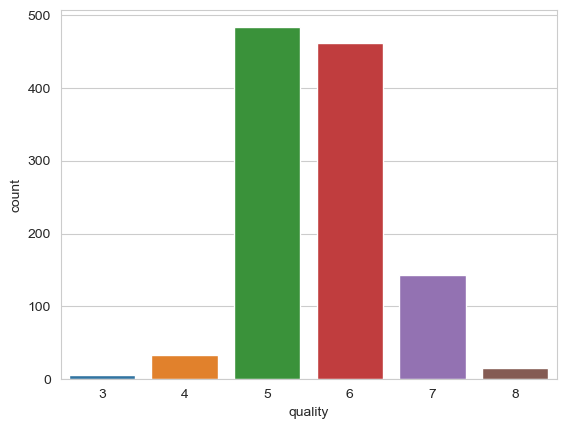

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='quality',data=df1)

Majority of the observations belongs to wine quality 5 and 6

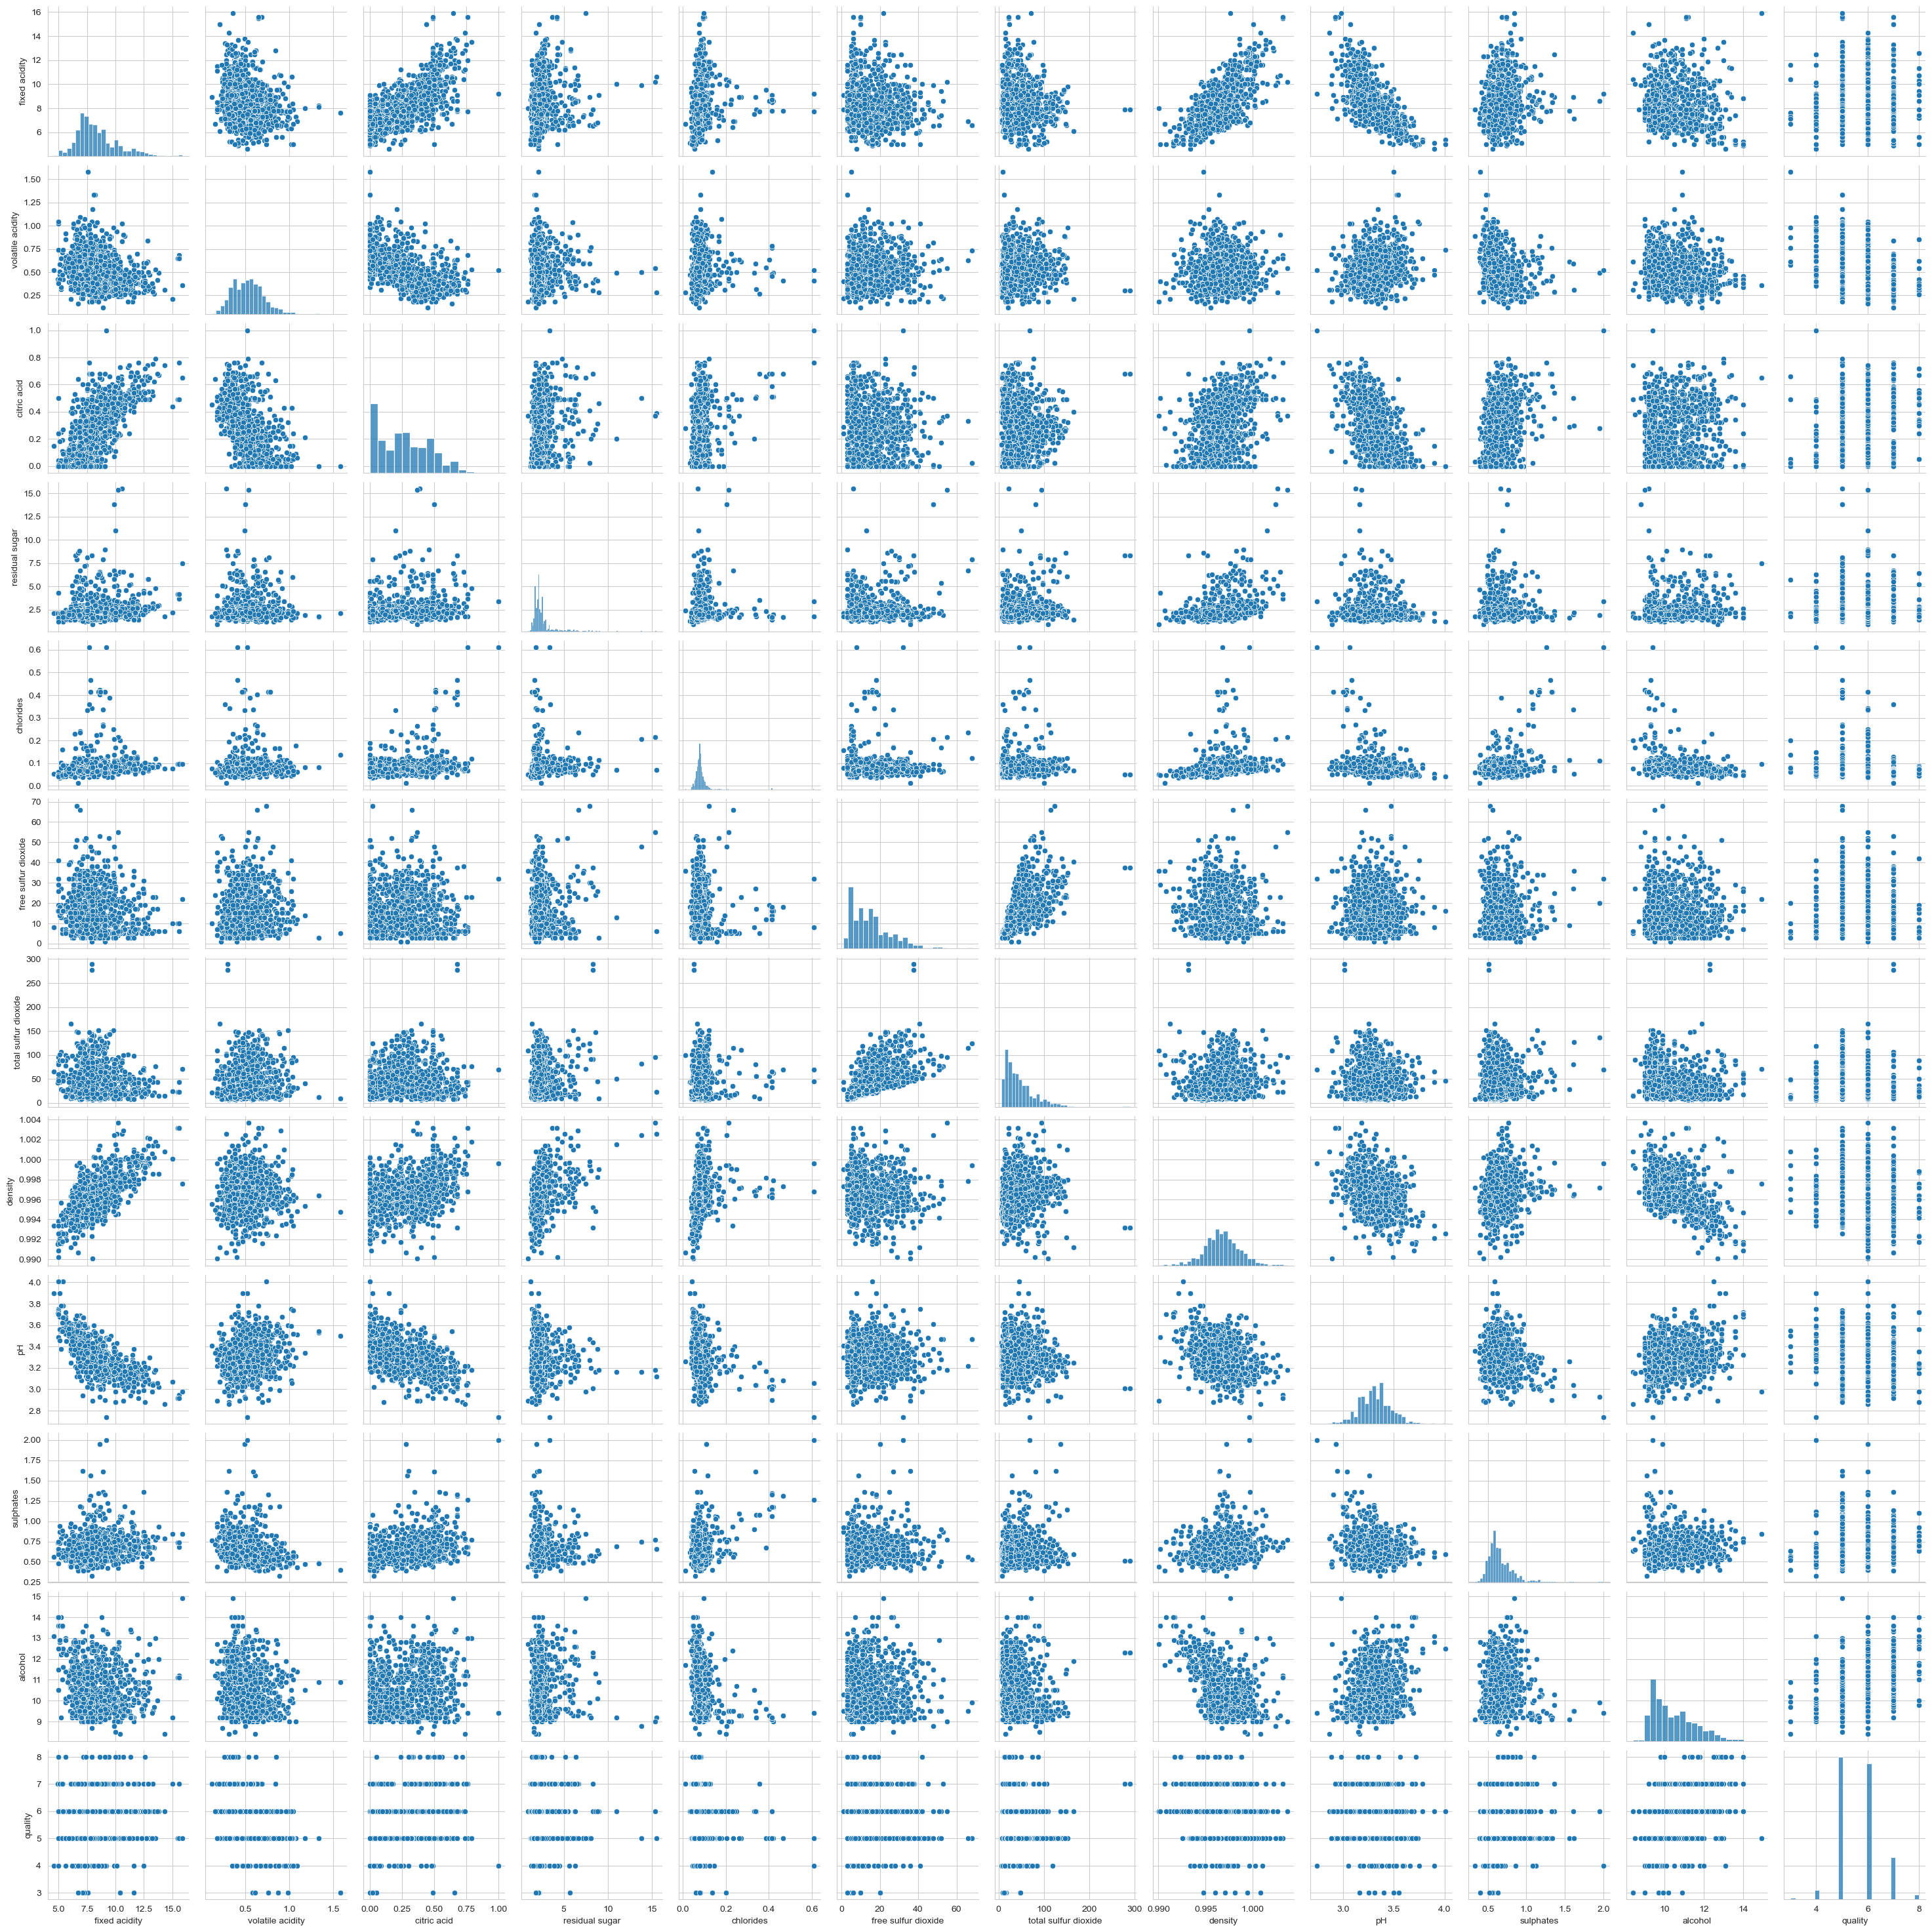

In [17]:
# Visualise the dataset
sns.pairplot(df1)

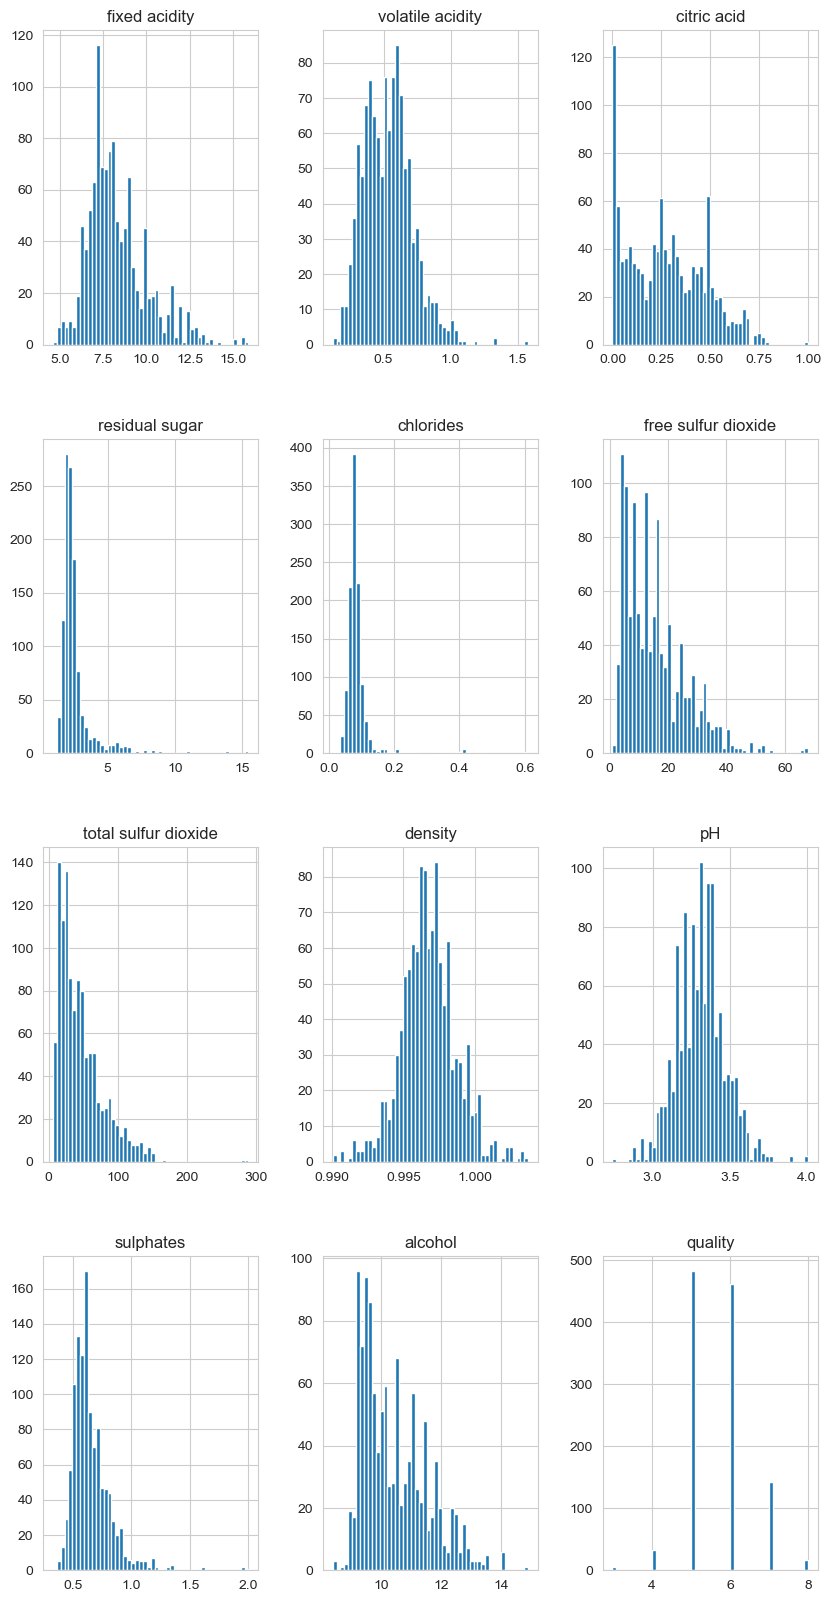

In [18]:
df1.hist(figsize=(10,20),bins=50)
plt.show()

### Visualising different columns with respect to classes

<Axes: xlabel='quality', ylabel='fixed acidity'>

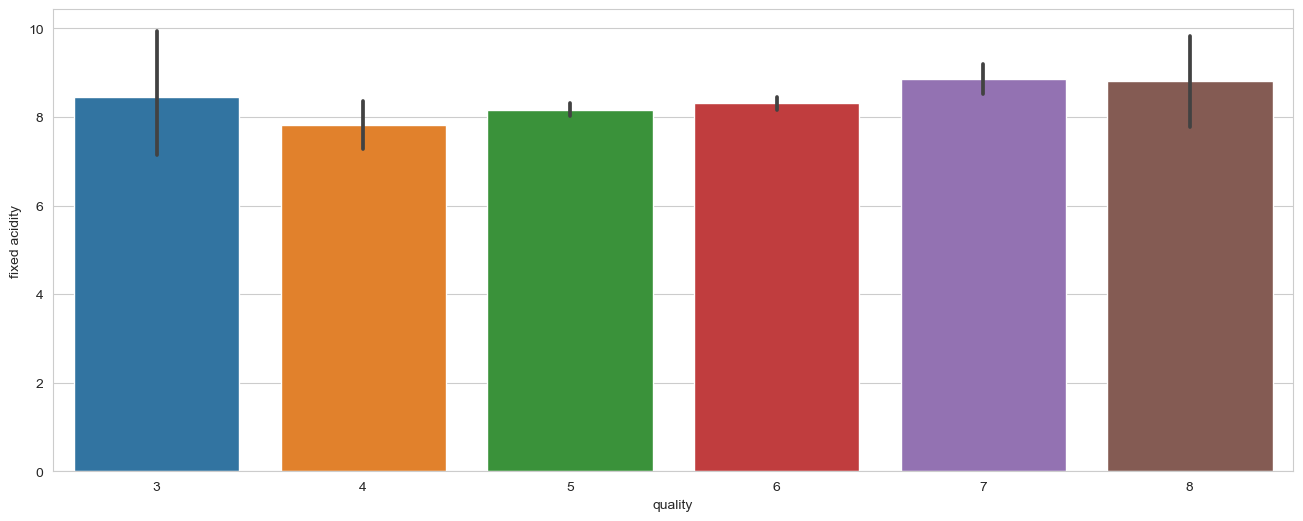

In [19]:
plt.figure(figsize = (16,6))
sns.barplot(x="quality", y = "fixed acidity",data=df1)


Value of fixed acidity is almost same in each quality.

<Axes: xlabel='quality', ylabel='volatile acidity'>

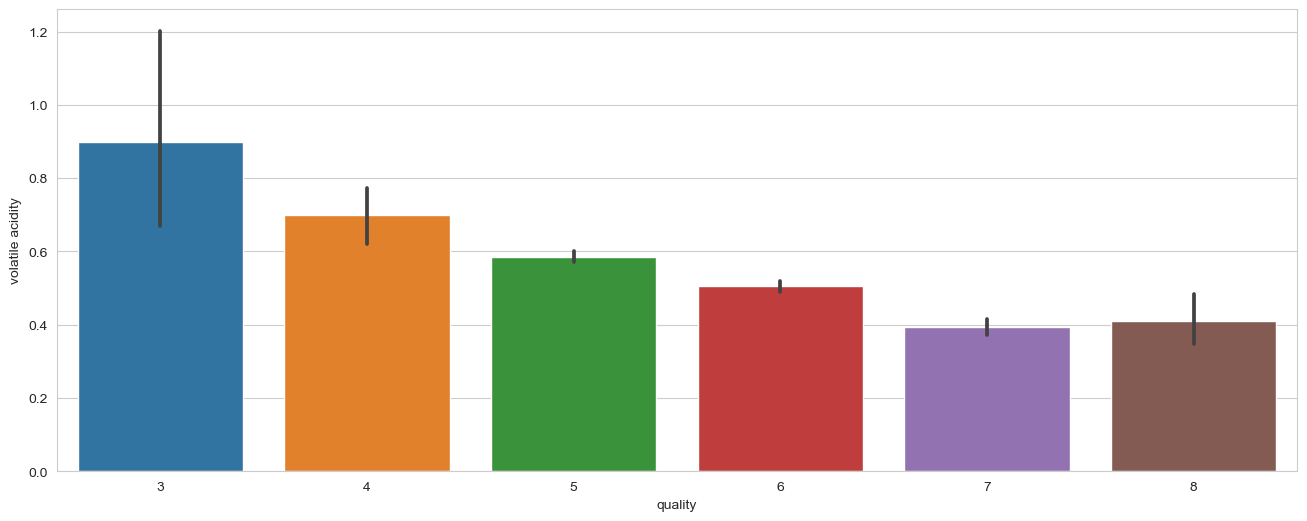

In [20]:
plt.figure(figsize = (16,6))
sns.barplot(x="quality",y="volatile acidity",data=df1)


Wine quality and volatile acidity have inverse relationship.


<Axes: xlabel='quality', ylabel='citric acid'>

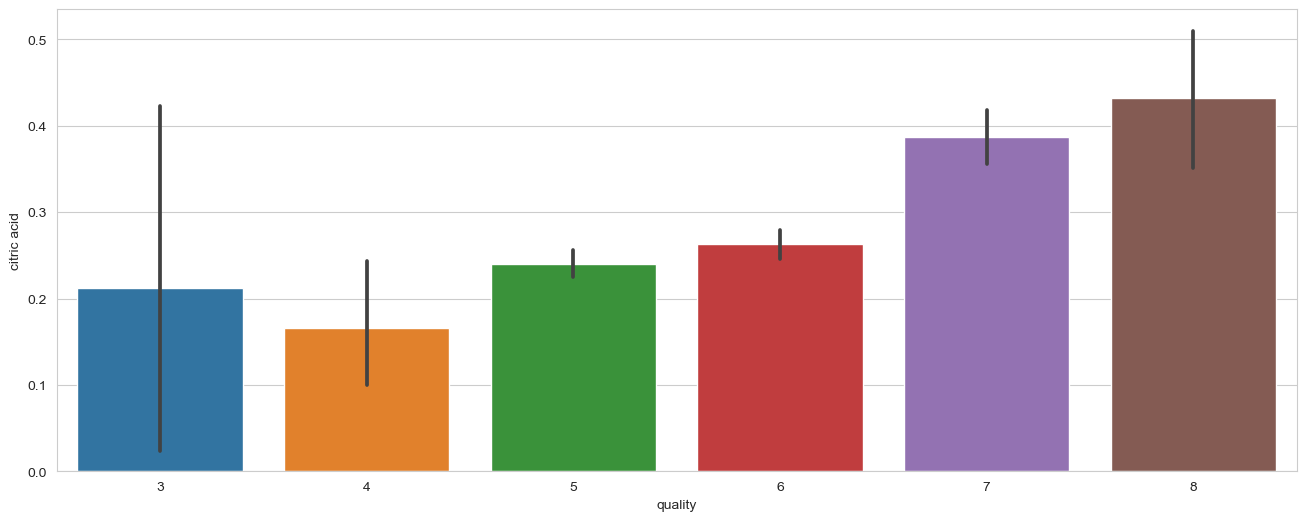

In [21]:
plt.figure(figsize = (16,6))
sns.barplot(x="quality",y="citric acid",data=df1)


Amount of citric acid is increasing with quality

<Axes: xlabel='quality', ylabel='residual sugar'>

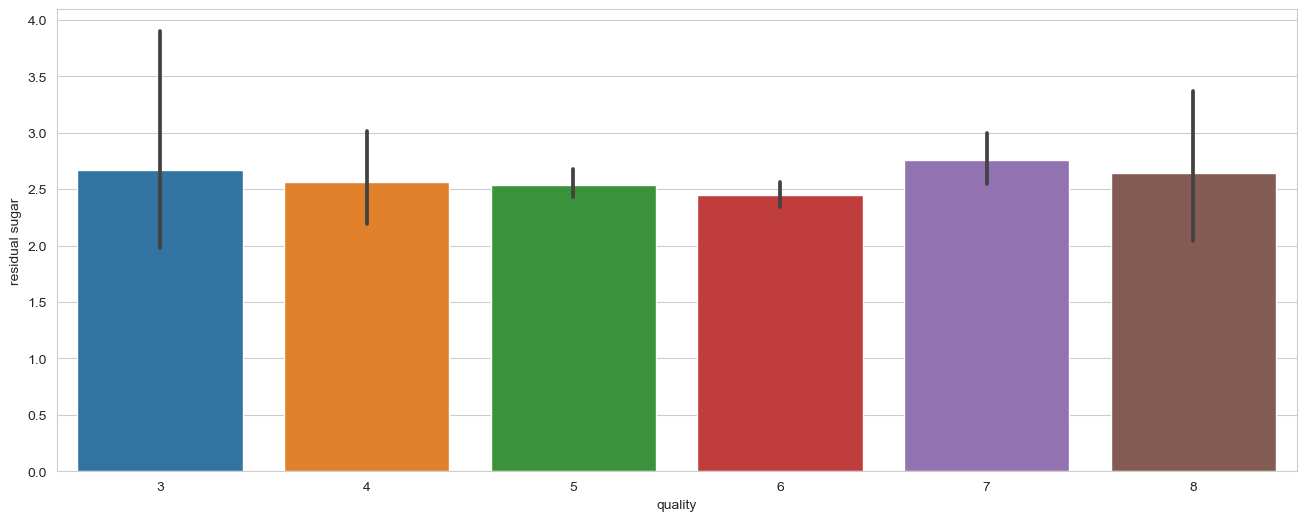

In [22]:
plt.figure(figsize = (16,6))
sns.barplot(x="quality",y="residual sugar",data=df1)


Value of residual sugar is almost same in each quality.

<Axes: xlabel='quality', ylabel='sulphates'>

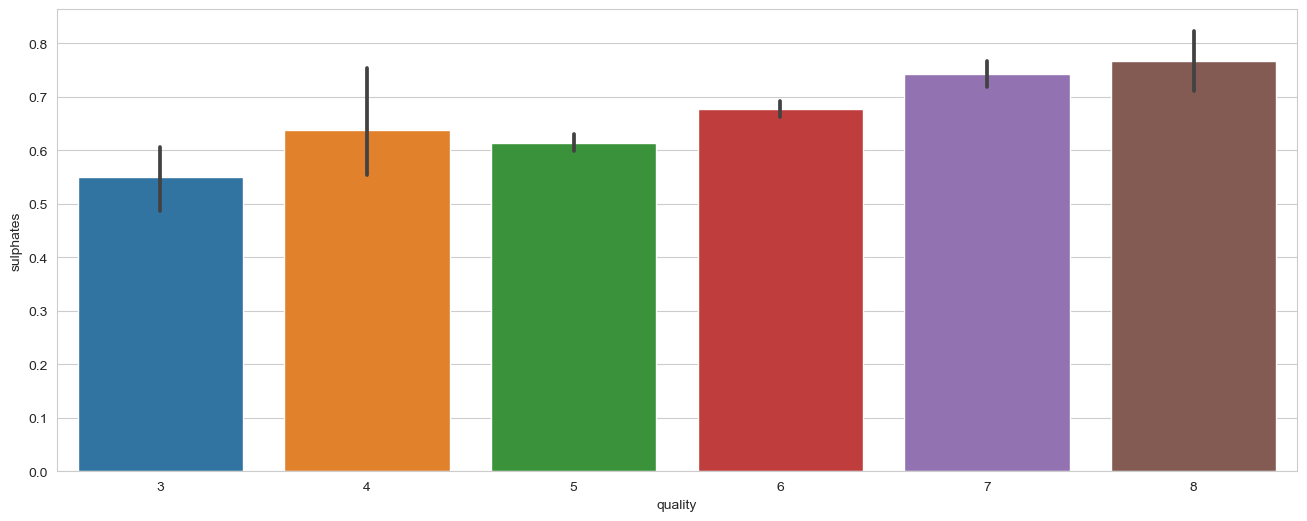

In [23]:
plt.figure(figsize = (16,6))
sns.barplot(x="quality",y="sulphates",data=df1)


Amount of sulphate is increasing with quality

<Axes: xlabel='quality', ylabel='chlorides'>

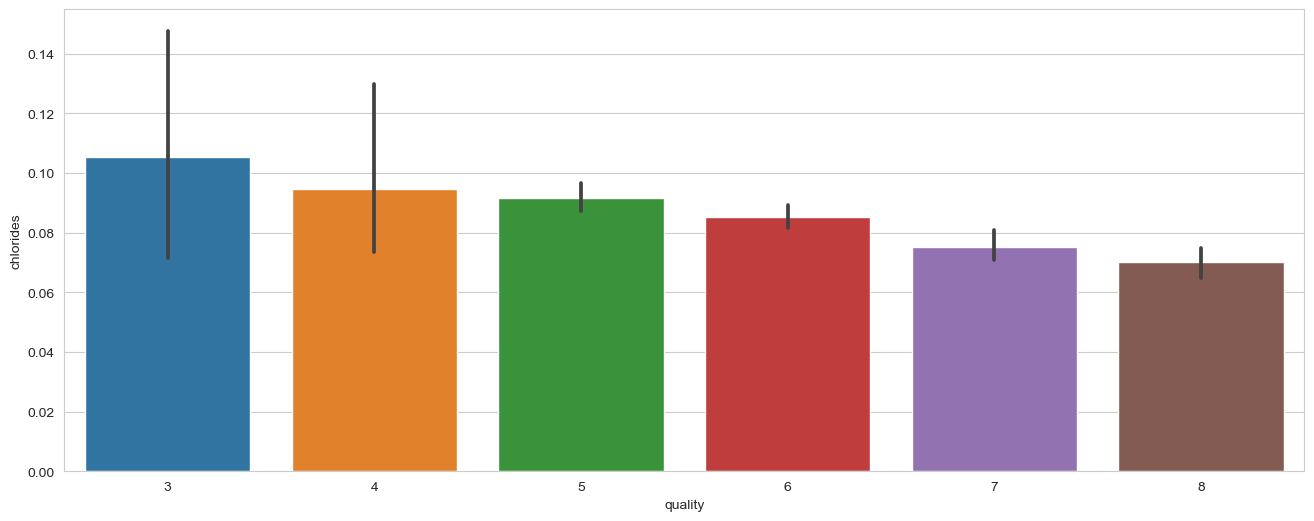

In [24]:
plt.figure(figsize = (16,6))
sns.barplot(x="quality",y="chlorides",data=df1)


Amount of chloride is decreasing with quality

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

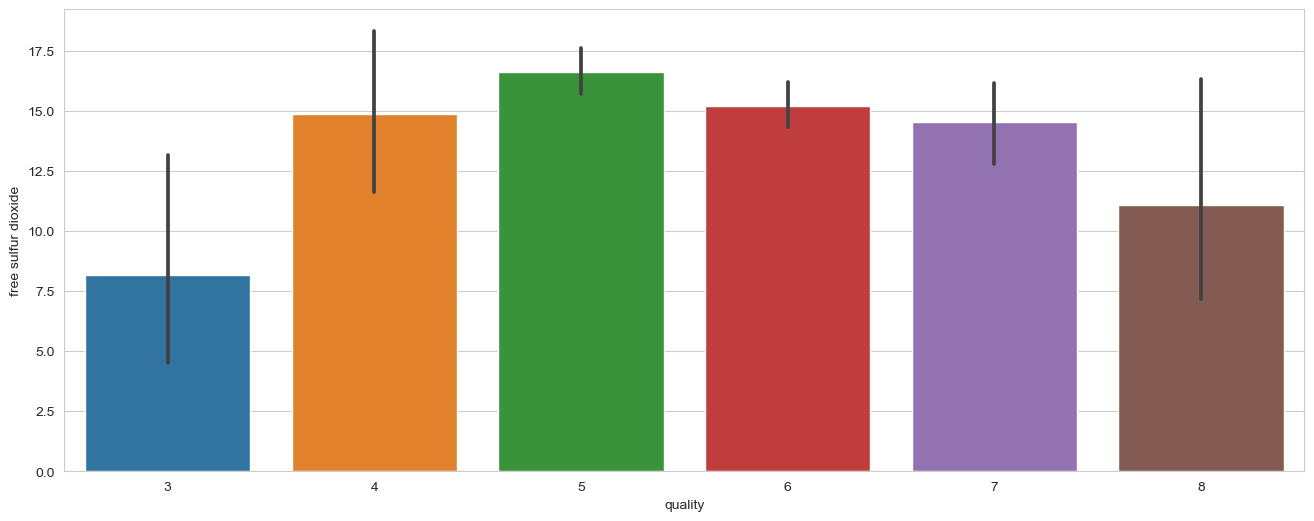

In [25]:
plt.figure(figsize = (16,6))
sns.barplot(x="quality",y="free sulfur dioxide",data=df1)


free sulfur dioxide is varying.

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

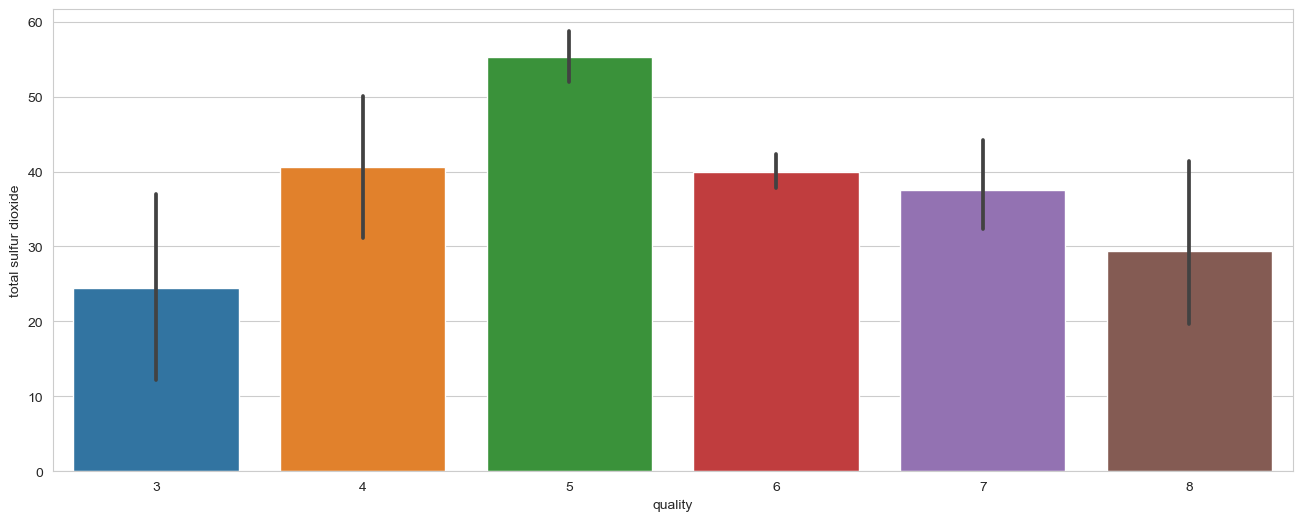

In [26]:
plt.figure(figsize = (16,6))
sns.barplot(x="quality",y="total sulfur dioxide",data=df1)


total sulfur dioxide is low for good and bad quality.

<Axes: xlabel='quality', ylabel='density'>

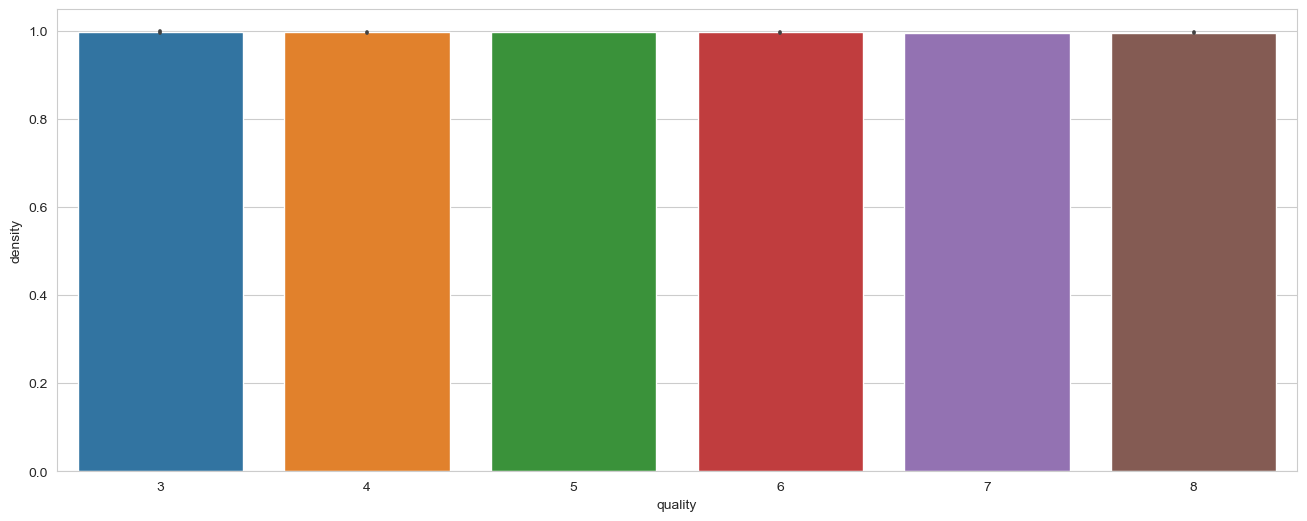

In [27]:
plt.figure(figsize = (16,6))
sns.barplot(x="quality",y="density",data=df1)


It is almost constant.

<Axes: xlabel='quality', ylabel='pH'>

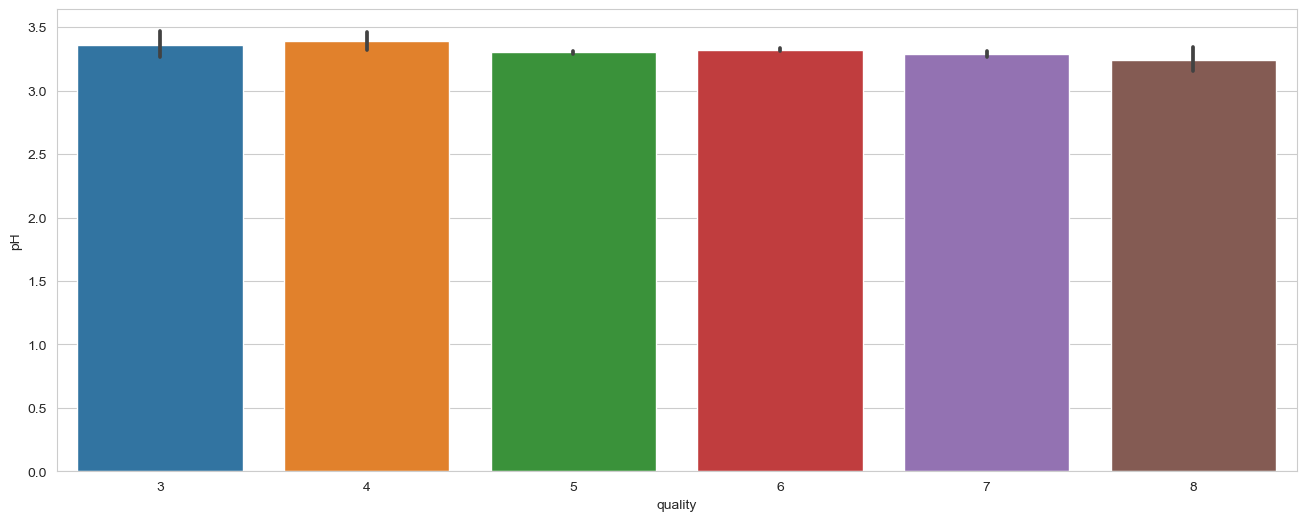

In [28]:
plt.figure(figsize = (16,6))
sns.barplot(x="quality",y="pH",data=df1)


It is almost constant.

<Axes: xlabel='quality', ylabel='alcohol'>

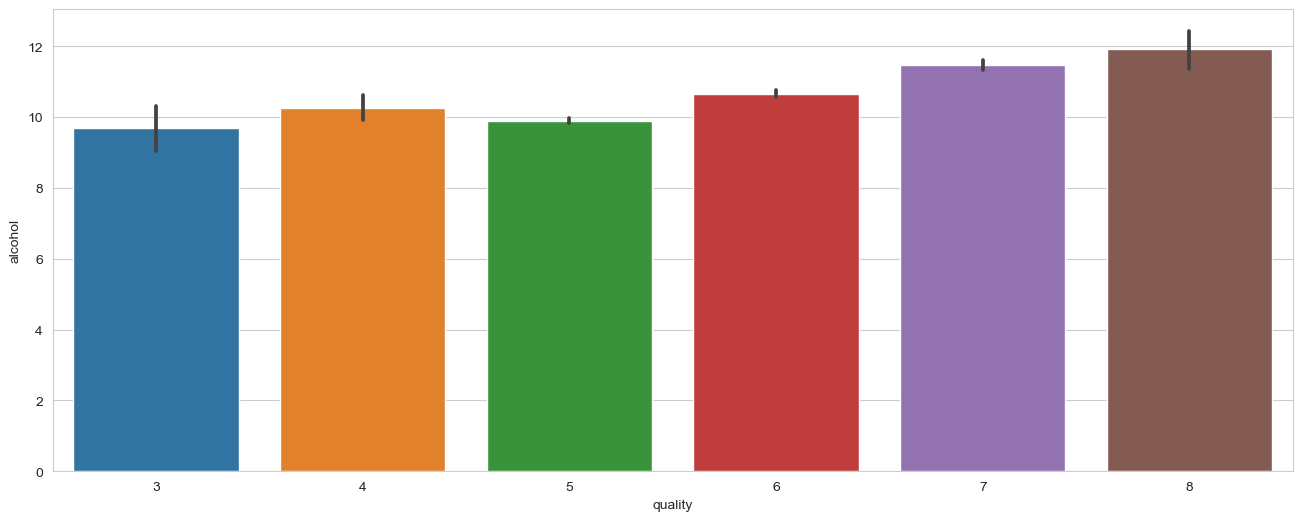

In [29]:
plt.figure(figsize = (16,6))
sns.barplot(x="quality",y="alcohol",data=df1)

Amount of Alcohol is increasing with quality.

## Relationship of features with each other

In [30]:
features = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

In [31]:
X = df1[features]
y = df1['quality']


Features and target are separated

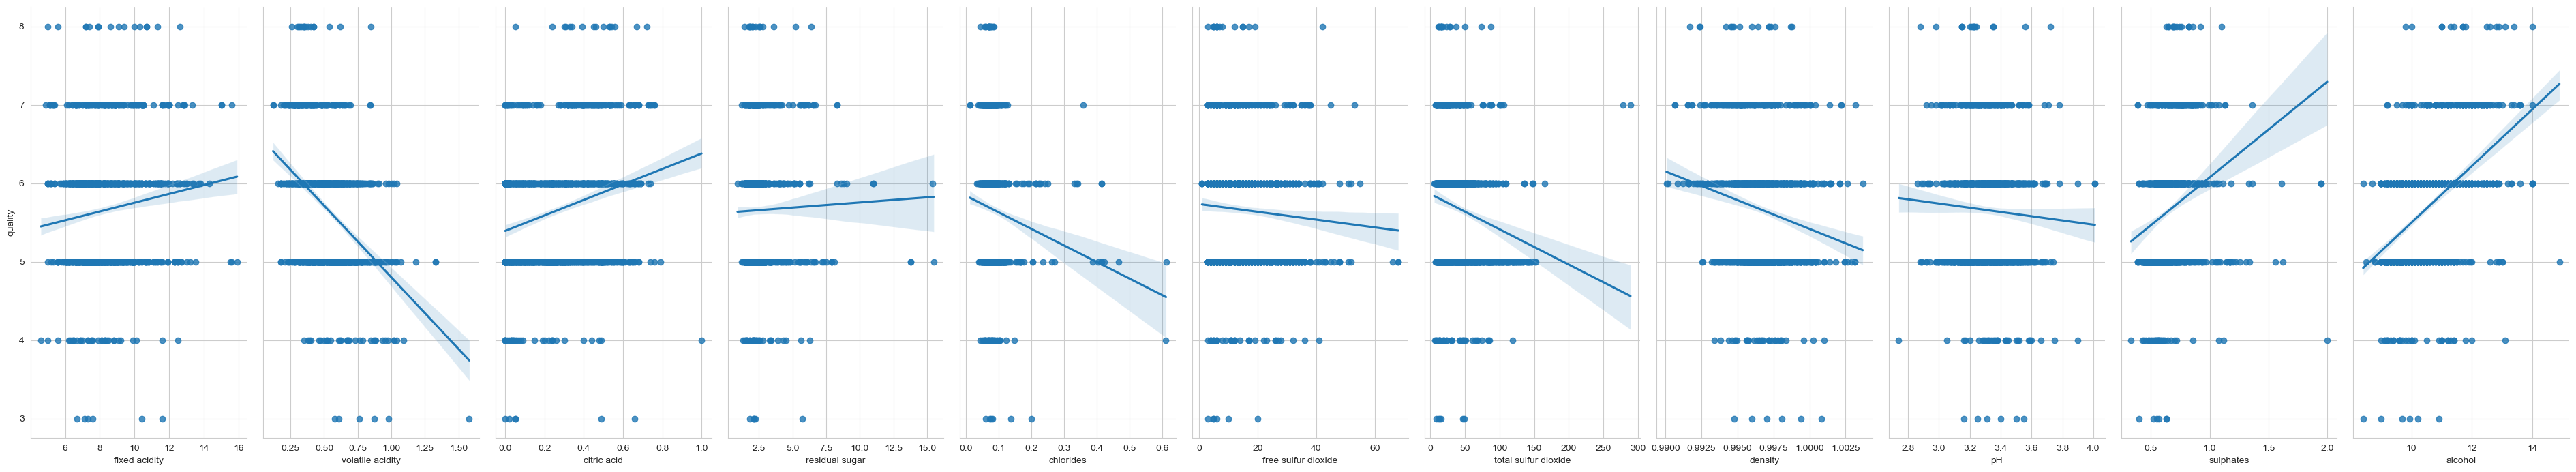

In [32]:
sns.pairplot(df1, x_vars=features, y_vars='quality', kind = 'reg', height=7, aspect = 0.5)

### Histogram

<Axes: >

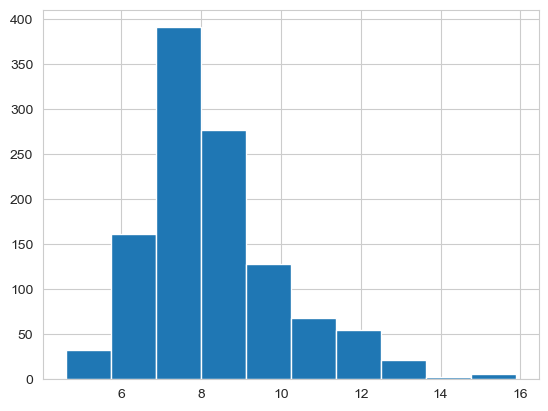

In [33]:
df1['fixed acidity'].hist()

Maximum value between 7-9

<Axes: >

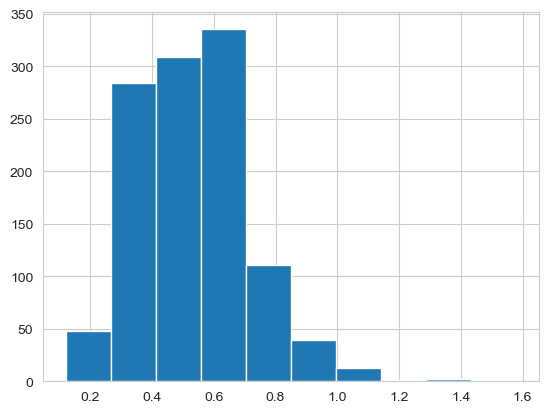

In [34]:
df1['volatile acidity'].hist()

Highest count between 0.6-0.7

<Axes: >

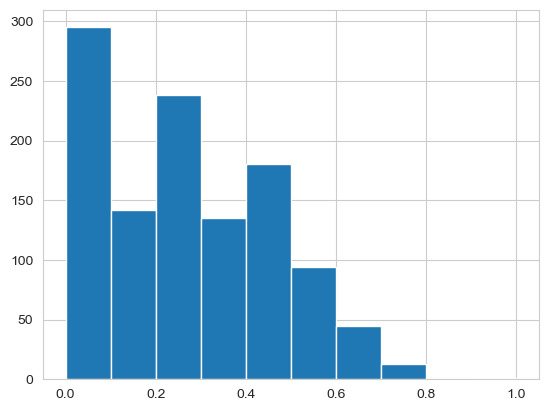

In [35]:
df1['citric acid'].hist()

Highest count at 0

<Axes: >

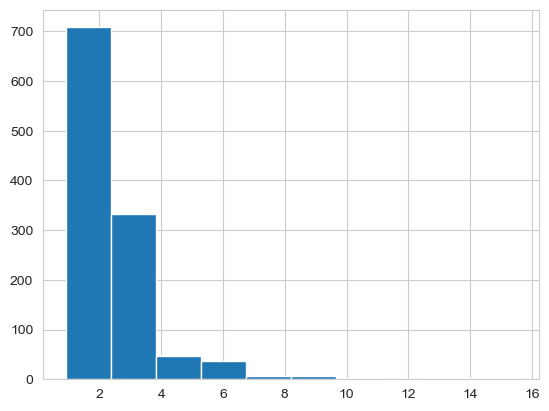

In [36]:
df1['residual sugar'].hist()

Highest count between 1-2

<Axes: >

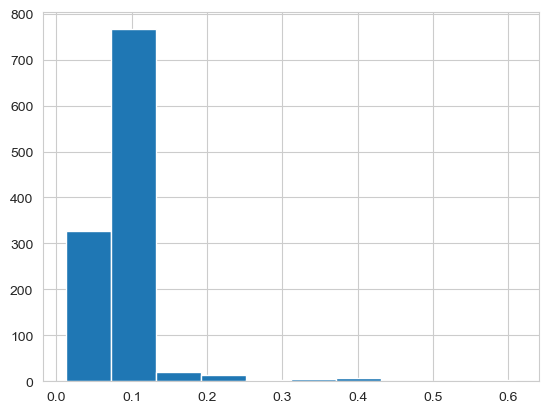

In [37]:
df1['chlorides'].hist()

Highest count upto 0.15

<Axes: >

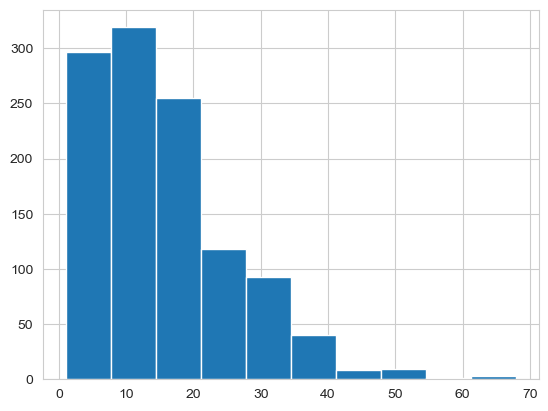

In [38]:
df1['free sulfur dioxide'].hist()

Very few value after 40

<Axes: >

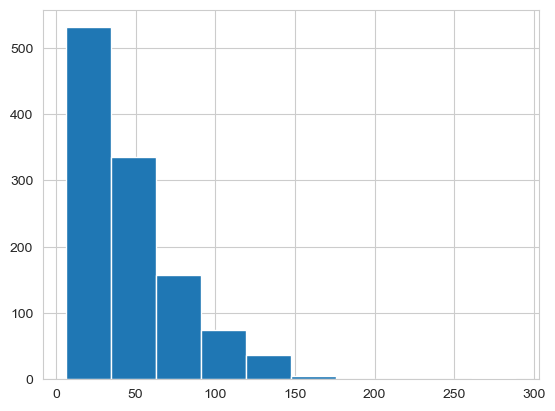

In [39]:
df1['total sulfur dioxide'].hist()


Very few value after 120

<Axes: >

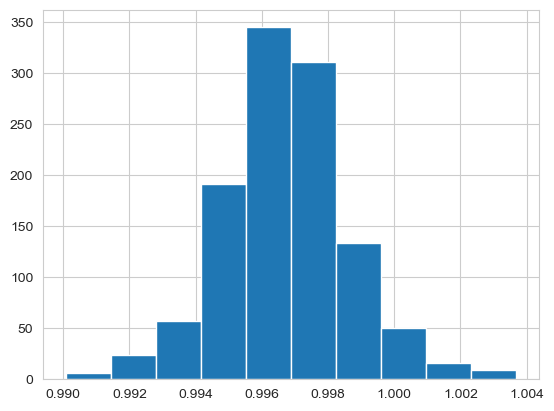

In [40]:
df1['density'].hist()

Maximum count between 0.994-1

<Axes: >

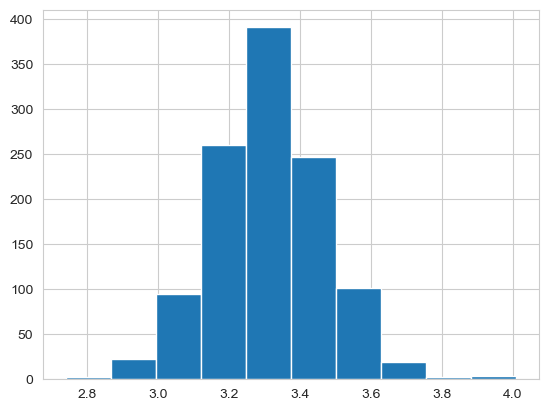

In [41]:
df1['pH'].hist()

Maximum count between 3.2-3.4

<Axes: >

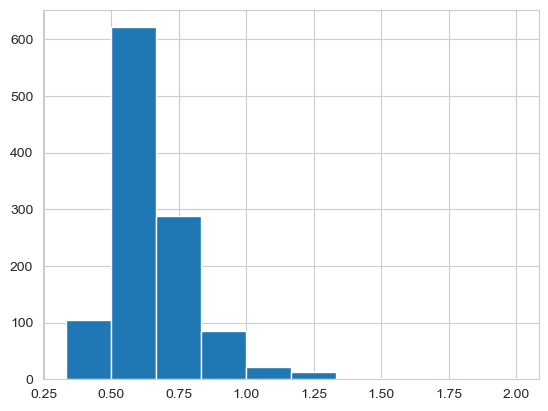

In [42]:
df1['sulphates'].hist()

Maximum count at 0.50

<Axes: >

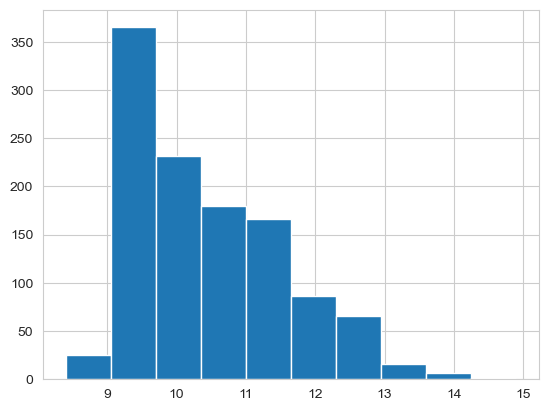

In [43]:
df1['alcohol'].hist()

Very few value after 12

### Box Plot

Text(0.5, 1.0, 'Boxplot of fixed acidity')

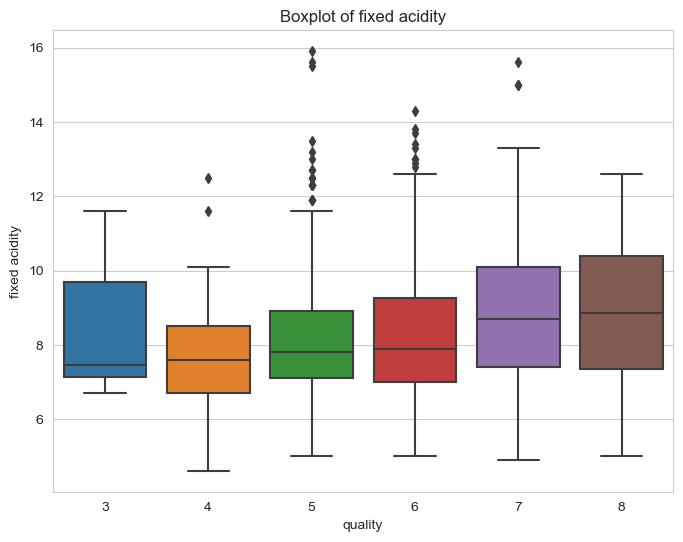

In [44]:
# To Check the Outliers
plt.figure(figsize=[8,6])
sns.boxplot(x="quality",y="fixed acidity",data=df1)
plt.title("Boxplot of fixed acidity")


Outliers are present.

Text(0.5, 1.0, 'Boxplot of volatile acidity')

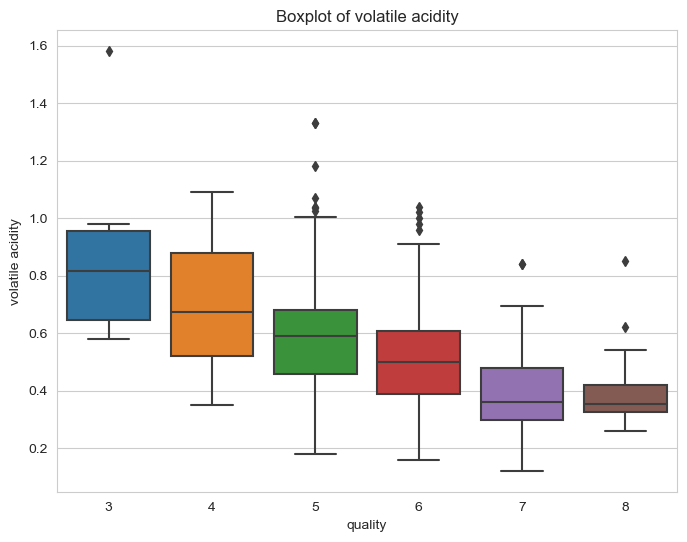

In [45]:
# To Check the Outliers
plt.figure(figsize=[8,6])
sns.boxplot(x="quality",y="volatile acidity",data=df1)
plt.title("Boxplot of volatile acidity")

Outliers are present.

Text(0.5, 1.0, 'Boxplot of citric acid')

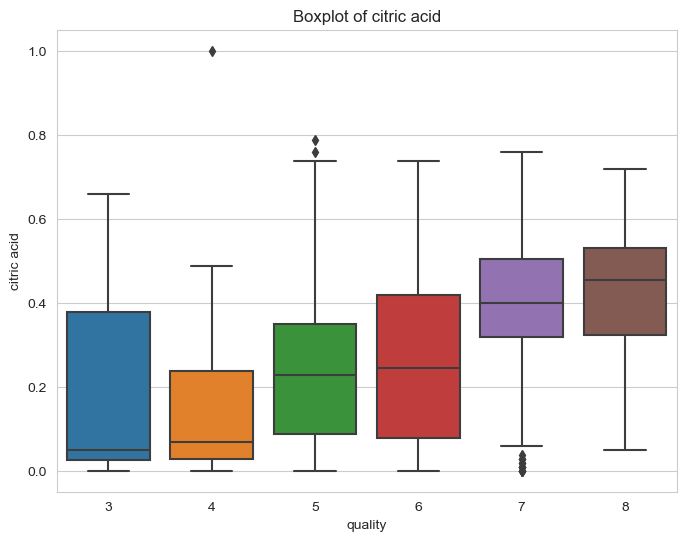

In [46]:
# To Check the Outliers
plt.figure(figsize=[8,6])
sns.boxplot(x="quality",y="citric acid",data=df1)
plt.title("Boxplot of citric acid")

Very few outliers.

Text(0.5, 1.0, 'Boxplot of residual sugar')

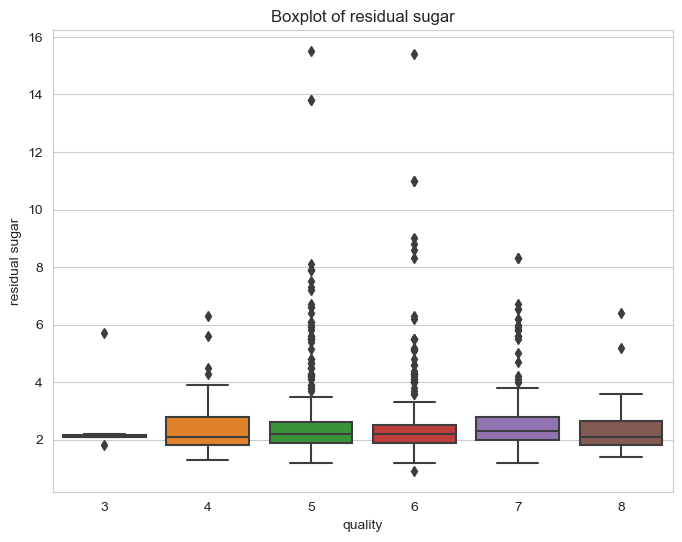

In [47]:
# To Check the Outliers
plt.figure(figsize=[8,6])
sns.boxplot(x="quality",y="residual sugar",data=df1)
plt.title("Boxplot of residual sugar")

Outliers are present.

Text(0.5, 1.0, 'Boxplot of chlorides')

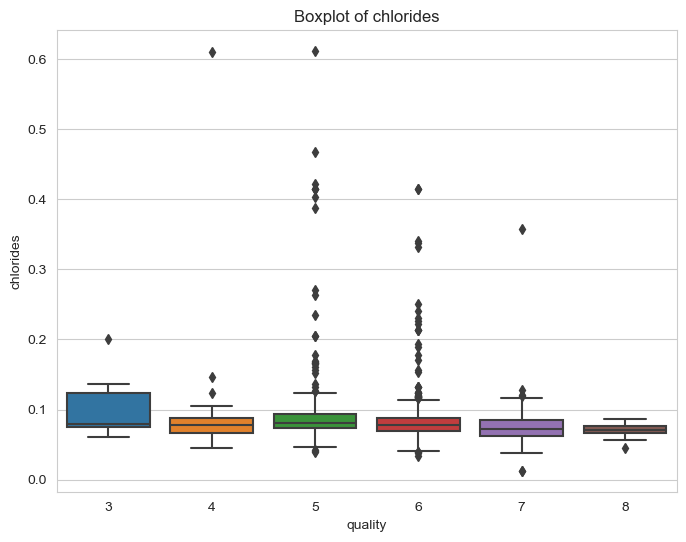

In [48]:
# To Check the Outliers
plt.figure(figsize=[8,6])
sns.boxplot(x="quality",y="chlorides",data=df1)
plt.title("Boxplot of chlorides")

Outliers are present.

Text(0.5, 1.0, 'Boxplot of free sulfur dioxide')

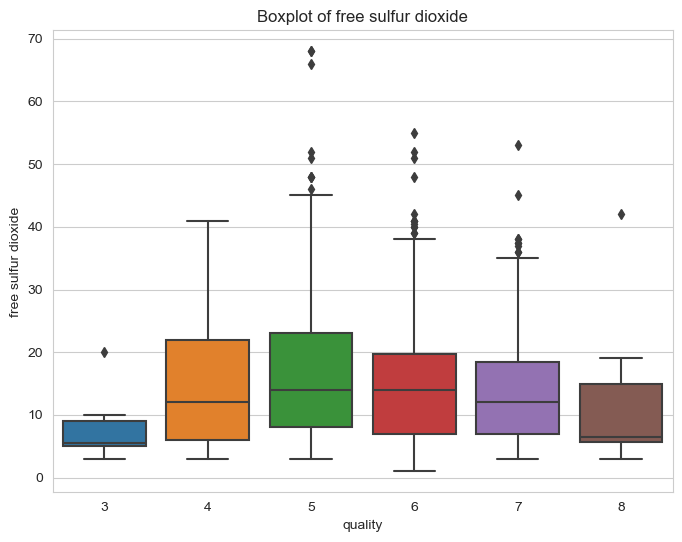

In [49]:
# To Check the Outliers
plt.figure(figsize=[8,6])
sns.boxplot(x="quality",y="free sulfur dioxide",data=df1)
plt.title("Boxplot of free sulfur dioxide")

Outliers are present.

Text(0.5, 1.0, 'Boxplot of total sulfur dioxide')

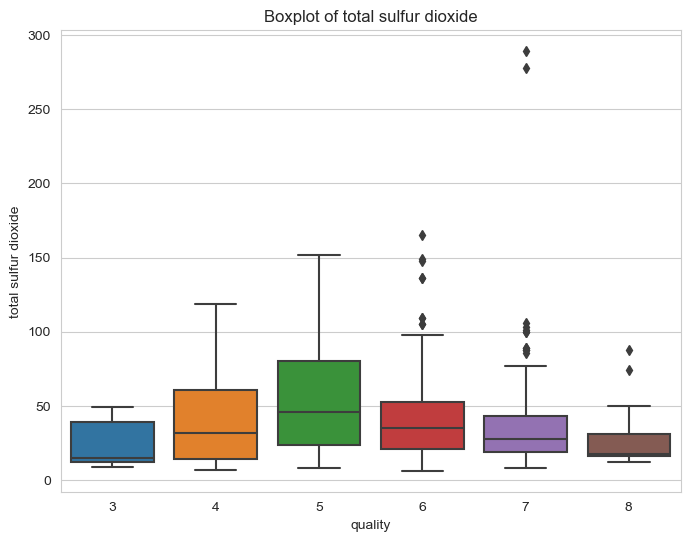

In [50]:
# To Check the Outliers
plt.figure(figsize=[8,6])
sns.boxplot(x="quality",y="total sulfur dioxide",data=df1)
plt.title("Boxplot of total sulfur dioxide")

A few outliers are present.

Text(0.5, 1.0, 'Boxplot of density')

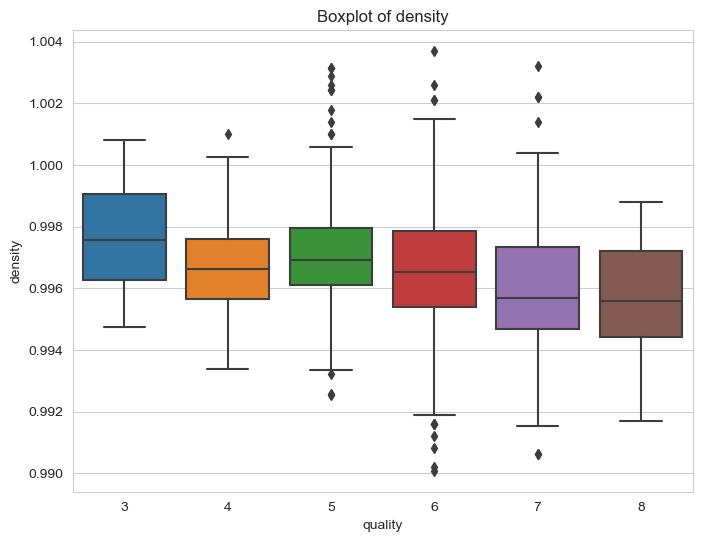

In [51]:
# To Check the Outliers
plt.figure(figsize=[8,6])
sns.boxplot(x="quality",y="density",data=df1)
plt.title("Boxplot of density")


Outliers are present.

Text(0.5, 1.0, 'Boxplot of pH')

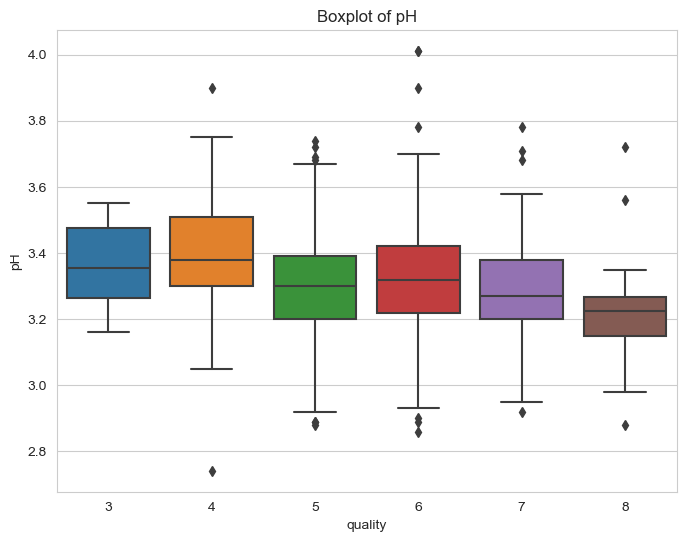

In [52]:
# To Check the Outliers
plt.figure(figsize=[8,6])
sns.boxplot(x="quality",y="pH",data=df1)
plt.title("Boxplot of pH")


A few outliers are present.

Text(0.5, 1.0, 'Boxplot of sulphates')

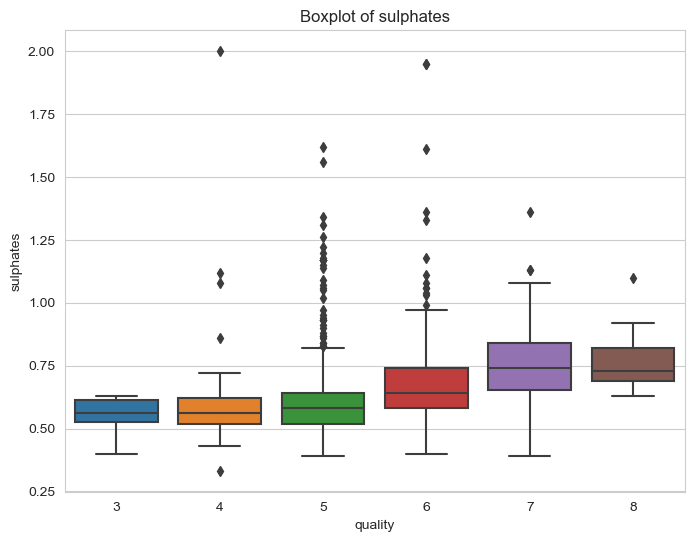

In [53]:
# To Check the Outliers
plt.figure(figsize=[8,6])
sns.boxplot(x="quality",y="sulphates",data=df1)
plt.title("Boxplot of sulphates")

Outliers are present.

Text(0.5, 1.0, 'Boxplot of alcohol')

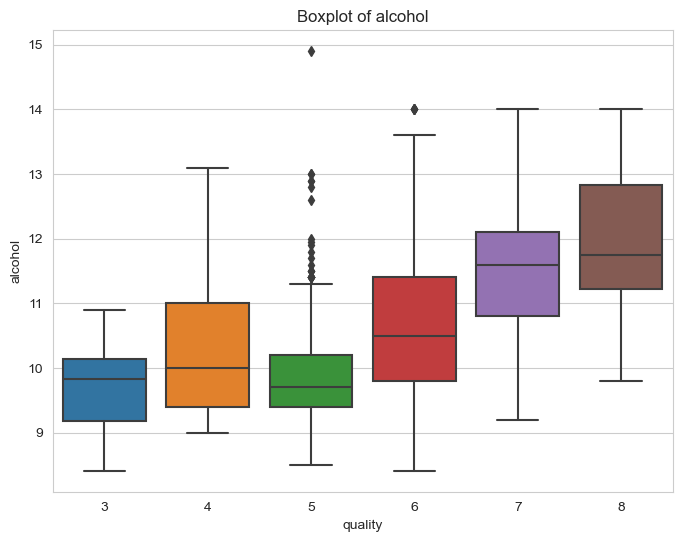

In [54]:
# To Check the Outliers
plt.figure(figsize=[8,6])
sns.boxplot(x="quality",y="alcohol",data=df1)
plt.title("Boxplot of alcohol")

A few outliers are present.

## Correlation metrics

In [55]:
correlaion = df1.corr()

<Axes: >

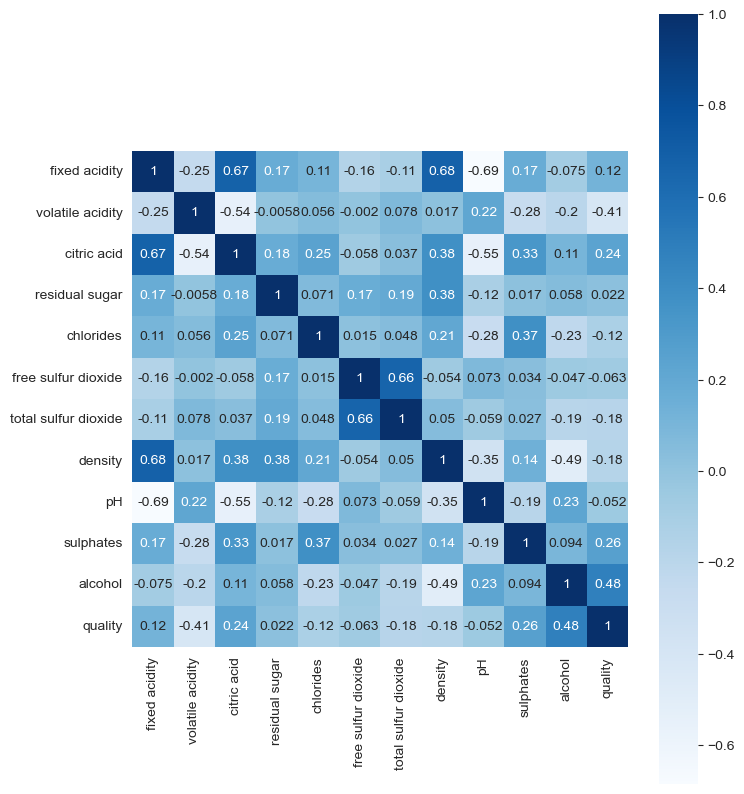

In [56]:
fig = plt.subplots(figsize = (8,10))
sns.heatmap(correlaion, vmax=1, square=True, annot=True, cmap ='Blues')

In [57]:
#impact of various factor on quality
correlaion.sort_values(by='quality',ascending=False)

fixed acidity  volatile acidity  citric acid  \
quality                    0.121970         -0.407394     0.240821   
alcohol                   -0.075055         -0.203909     0.106250   
sulphates                  0.174592         -0.276079     0.331232   
citric acid                0.673157         -0.544187     1.000000   
fixed acidity              1.000000         -0.250728     0.673157   
residual sugar             0.171831         -0.005751     0.175815   
pH                        -0.685163          0.221492    -0.546339   
free sulfur dioxide       -0.164831         -0.001962    -0.057589   
chlorides                  0.107889          0.056336     0.245312   
density                    0.681501          0.016512     0.375243   
total sulfur dioxide      -0.110628          0.077748     0.036871   
volatile acidity          -0.250728          1.000000    -0.544187   

                      residual sugar  chlorides  free sulfur dioxide  \
quality                     0.022002  -0.124085            -0.063260   
alcohol                     0.058421  -0.229917            -0.047095   
sulphates                   0.017475   0.374784             0.034445   
citric acid                 0.175815   0.245312            -0.057589   
fixed acidity               0.171831   0.107889            -0.164831   
residual sugar              1.000000   0.070863             0.165339   
pH                         -0.116959  -0.277759             0.072804   
free sulfur dioxide         0.165339   0.015280             1.000000   
chlorides                   0.070863   1.000000             0.015280   
density                     0.380147   0.208901            -0.054150   
total sulfur dioxide        0.190790   0.048163             0.661093   
volatile acidity           -0.005751   0.056336            -0.001962   

                      total sulfur dioxide   density        pH  sulphates  \
quality                          -0.183339 -0.175208 -0.052453   0.257710   
alcohol                          -0.188165 -0.494727  0.225322   0.094421   
sulphates                         0.026894  0.143139 -0.185499   1.000000   
citric acid                       0.036871  0.375243 -0.546339   0.331232   
fixed acidity                    -0.110628  0.681501 -0.685163   0.174592   
residual sugar                    0.190790  0.380147 -0.116959   0.017475   
pH                               -0.059126 -0.352775  1.000000  -0.185499   
free sulfur dioxide               0.661093 -0.054150  0.072804   0.034445   
chlorides                         0.048163  0.208901 -0.277759   0.374784   
density                           0.050175  1.000000 -0.352775   0.143139   
total sulfur dioxide              1.000000  0.050175 -0.059126   0.026894   
volatile acidity                  0.077748  0.016512  0.221492  -0.276079   

                       alcohol   quality  
quality               0.484866  1.000000  
alcohol               1.000000  0.484866  
sulphates             0.094421  0.257710  
citric acid           0.106250  0.240821  
fixed acidity        -0.075055  0.121970  
residual sugar        0.058421  0.022002  
pH                    0.225322 -0.052453  
free sulfur dioxide  -0.047095 -0.063260  
chlorides            -0.229917 -0.124085  
density              -0.494727 -0.175208  
total sulfur dioxide -0.188165 -0.183339  
volatile acidity     -0.203909 -0.407394

Alcohol and quality are positively correlated.

Total sulfur dioxide and free sulfur dioxide are highly correlated.

## Data Preprocessing

### Normalize the numerical variables

In [58]:
sc = StandardScaler()
X_res = sc.fit_transform(X)
#X_test = sc.transform(X_test)

#### VIF

In [59]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_res,i) for i in range(X_res.shape[1])]
vif["Features"] = X.columns
vif

vif              Features
0   7.780540         fixed acidity
1   1.778704      volatile acidity
2   3.222840           citric acid
3   1.743237        residual sugar
4   1.538470             chlorides
5   1.906045   free sulfur dioxide
6   2.103748  total sulfur dioxide
7   6.595115               density
8   3.393307                    pH
9   1.440741             sulphates
10  3.184642               alcohol

vif exceeding 5 or 10  indicates high multicollinearity

we can drop fixed acidity and density

In [60]:
X1 = df1.drop(['fixed acidity','density','total sulfur dioxide'],axis=1)
X1.shape

(1143, 9)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X1,y, test_size=0.2 ,random_state = 3)

In [62]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(914, 9)
(914,)
(229, 9)
(229,)


70 percent for training, 30 percent for testing

In [63]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model

In [64]:
regressor = LinearRegression()

In [65]:
regressor.fit(X_train,y_train)

LinearRegression()

### Accuracy of the model

In [66]:
accuracy = regressor.score(X_test,y_test)
accuracy


1.0

In [67]:
#Intercept
regressor.intercept_


5.652078774617068

In [68]:
#Coefficient
regressor.coef_

array([ 4.36703504e-16,  3.33066907e-16, -1.23815888e-16,  1.30104261e-16,
        1.52221985e-16, -2.91433544e-16,  1.80411242e-16, -4.64905892e-16,
        7.90646254e-01])

In [69]:
train_pred=regressor.predict(X_train)
train_pred

array([7., 5., 5., 5., 5., 6., 7., 5., 6., 7., 5., 6., 6., 5., 5., 6., 6.,
       5., 6., 5., 6., 5., 8., 6., 7., 6., 6., 6., 7., 6., 6., 6., 5., 5.,
       5., 5., 5., 6., 6., 5., 7., 6., 6., 7., 8., 7., 7., 6., 6., 6., 5.,
       6., 6., 6., 6., 5., 5., 6., 6., 6., 6., 5., 6., 5., 6., 6., 7., 5.,
       5., 5., 8., 6., 5., 5., 7., 7., 5., 6., 5., 5., 5., 6., 6., 5., 5.,
       6., 6., 5., 6., 5., 5., 4., 6., 6., 6., 5., 5., 6., 6., 5., 6., 7.,
       6., 6., 6., 5., 5., 5., 5., 7., 6., 6., 5., 5., 5., 6., 5., 5., 7.,
       5., 4., 6., 6., 5., 6., 7., 6., 5., 4., 5., 5., 5., 5., 5., 6., 6.,
       6., 7., 5., 5., 5., 7., 5., 5., 6., 5., 6., 6., 7., 5., 6., 7., 5.,
       4., 5., 6., 7., 5., 6., 5., 5., 5., 5., 6., 6., 5., 5., 7., 7., 5.,
       5., 5., 5., 5., 6., 6., 5., 7., 6., 6., 7., 7., 5., 5., 5., 6., 6.,
       5., 6., 6., 5., 5., 5., 5., 7., 5., 6., 5., 7., 7., 6., 6., 5., 6.,
       5., 5., 6., 5., 6., 7., 7., 6., 4., 5., 6., 6., 6., 5., 6., 4., 6.,
       5., 5., 7., 6., 5.

In [70]:
test_pred=regressor.predict(X_test)
test_pred

array([6., 5., 6., 5., 7., 6., 5., 7., 5., 5., 6., 6., 5., 5., 5., 7., 5.,
       5., 6., 6., 5., 5., 6., 6., 5., 6., 6., 6., 5., 5., 6., 6., 5., 5.,
       5., 5., 5., 6., 6., 7., 5., 5., 6., 5., 4., 5., 5., 7., 6., 8., 7.,
       6., 6., 6., 5., 7., 5., 5., 7., 6., 6., 7., 5., 5., 6., 7., 5., 7.,
       5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 5., 6., 6., 3., 6., 5., 6.,
       5., 6., 5., 7., 4., 5., 5., 7., 7., 6., 7., 5., 6., 7., 5., 8., 8.,
       5., 6., 5., 5., 6., 5., 5., 6., 5., 5., 6., 5., 5., 5., 5., 5., 6.,
       5., 6., 5., 6., 6., 5., 5., 5., 5., 5., 5., 7., 7., 6., 5., 7., 5.,
       7., 6., 6., 6., 6., 5., 6., 5., 6., 5., 7., 6., 6., 5., 5., 6., 6.,
       6., 7., 5., 7., 4., 5., 3., 7., 6., 5., 6., 5., 6., 6., 6., 5., 7.,
       5., 6., 5., 4., 5., 5., 7., 5., 5., 4., 5., 6., 6., 6., 7., 4., 5.,
       5., 6., 6., 5., 8., 5., 6., 8., 5., 7., 6., 5., 5., 5., 7., 6., 5.,
       5., 6., 6., 6., 6., 7., 5., 7., 5., 6., 7., 6., 6., 6., 5., 6., 5.,
       5., 6., 6., 7., 5.

### Prediction

In [71]:

prediction=regressor.predict(X_test)

In [72]:
prediction1=pd.DataFrame(prediction)
prediction1.head()

0
0  6.0
1  5.0
2  6.0
3  5.0
4  7.0

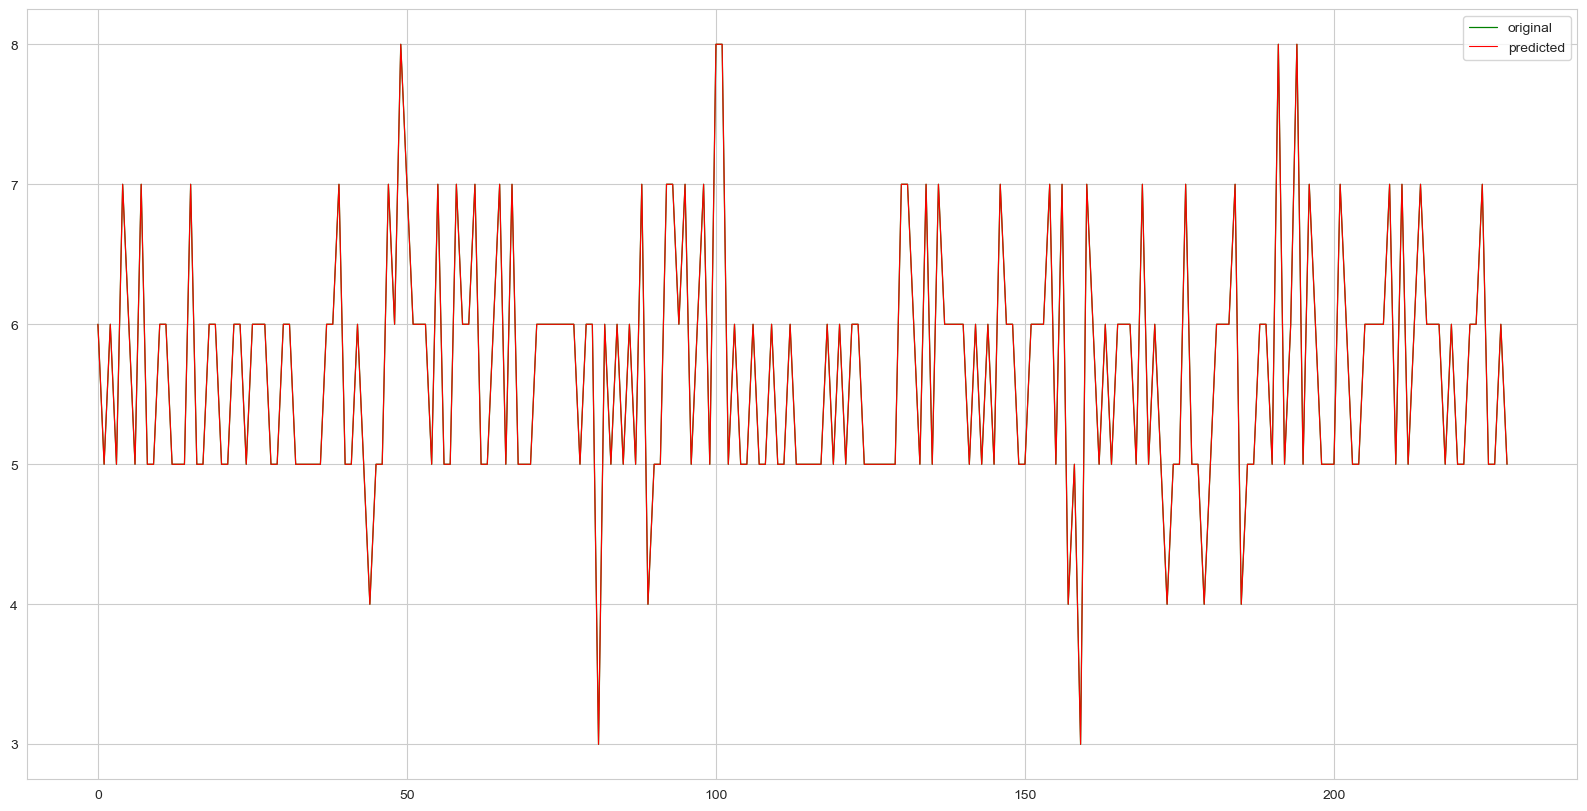

In [73]:
fig,ax = plt.subplots(figsize =(20,10))
x_ax = range(len(X_test))
plt.plot(x_ax,y_test,lw=0.9,color="green",label="original")
plt.plot(x_ax,test_pred,lw=0.8,color="red",label="predicted")
plt.legend()
plt.show()

### Root mean Squared Error

In [74]:
test_rmse = metrics.mean_squared_error(test_pred,y_test)**0.5
test_rmse

8.30555652041203e-16

In [75]:
r2_score(y_test,test_pred)

1.0

In [76]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:',rmse)

Mean Absolute Error: 4.983883272116424e-16
Mean Squared Error: 6.8982269113758784e-31
Root Mean Squared Error: 8.30555652041203e-16


### Predictions on new data

In [77]:
# Lastly, let's use the trained model to make predictions on new data and visualize the results
new_data = np.array([[0.5, 0.3, 0.6, 0.2, 0.8, 0.1, 0.2, 0.4, 0.5]])

# Create a new instance of StandardScaler for the new data
sc = StandardScaler()
new_data_scaled = sc.fit_transform(new_data)

# Make predictions
predicted_quality = regressor.predict(new_data_scaled)

print("Predicted Wine Quality:", predicted_quality[0])

Predicted Wine Quality: 5.652078774617068


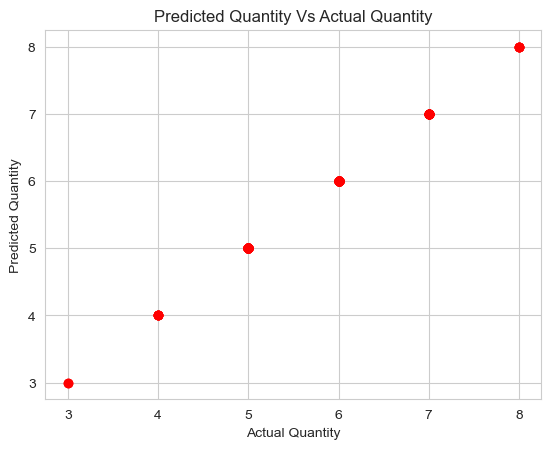

In [78]:
#displaying results
plt.scatter(y_test,test_pred, c='r')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Predicted Quantity Vs Actual Quantity')
plt.show()

## Save the Model

In [79]:
filename = 'wineqtprediction_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))